In [2]:
import pandas as pd

## Cargar Tweets

In [ ]:
df = pd.read_json('tweets_eeuu2.json')

## Definir columnas

In [62]:
cols = ['coordinates','text','lang']

In [ ]:
df_eeuu = df[cols]

## Filtrar los tweets en ingles

In [66]:
df_eeuu_filtrado= df_eeuu[df_eeuu['lang'] == 'en']

# Filtrar solo texto que sea valido

In [76]:
def filtar_texto_valido(df):
    lista_indices = []
    import re
    patron_texto_valido = re.compile('^[a-zA-Z 0-9,.;#@\'\"&?$%()-+!]*$')
    for txt in df['text']:
        if patron_texto_valido.match(txt):
            lista_indices.append(True)
        else:
            lista_indices.append(False)
    return df[lista_indices]

In [77]:
df_eeuu_filtrado_texto = filtar_texto_valido(df_eeuu_filtrado) 
    

In [80]:
df_eeuu_filtrado_texto

,coordinates,text,lang
5,None,"@aiv02 Mannnn, that is an understatement",en
8,None,@SpoopyYari What is NDFW??,en
18,None,@daaanielgeee Lol really,en
21,None,"Everybody is riding the ""Give me money"" train.",en
26,None,Credit trump korea adjacent elies,en
30,None,ummmmm Absucted In Plain Sight we need to have...,en
45,None,Congrats to Coach Cruthis &amp; @LebGirlsBball...,en
53,None,@friscojosh @ArifHasanNFL Do we reset the owne...,en
54,None,Still find it ironic someone as dishonest as T...,en
63,None,@CorporateKobe happt birthday brotha,en


## Realizar analisis de sentimientos

In [82]:
import textblob

In [83]:
def analizar_texto(df):
    df_nuevo = pd.DataFrame(columns=['texto','sentimiento'])
    for txt in df['text']:
        txt_tweet = textblob.TextBlob(txt)
        resultado = ''
        if txt_tweet.sentiment.polarity > 0:
            resultado = 'positive'
        elif txt_tweet.sentiment.polarity <0:
            resultado = 'negative'
        else:
            resultado = 'neutral'
        row = [txt,resultado]
        df_nuevo.loc[len(df_nuevo)] = row
    return df_nuevo

    
        

In [84]:

df_analalizado = analizar_texto(df_eeuu_filtrado_texto)

In [85]:
df_analalizado

,texto,sentimiento
0,"@aiv02 Mannnn, that is an understatement",neutral
1,@SpoopyYari What is NDFW??,neutral
2,@daaanielgeee Lol really,positive
3,"Everybody is riding the ""Give me money"" train.",neutral
4,Credit trump korea adjacent elies,neutral
5,ummmmm Absucted In Plain Sight we need to have...,negative
6,Congrats to Coach Cruthis &amp; @LebGirlsBball...,neutral
7,@friscojosh @ArifHasanNFL Do we reset the owne...,neutral
8,Still find it ironic someone as dishonest as T...,negative
9,@CorporateKobe happt birthday brotha,neutral


## Graficos

### Diagrama de pastel

In [86]:
frecuencias = df_analalizado['sentimiento'].value_counts().to_dict()

In [87]:
frecuencias

{'neutral': 83, 'positive': 46, 'negative': 24}

In [91]:
from pylab import *

def graficar(frecuencias,nombre_pais): 
    ax = axes([0, 0, 0.9, 0.9])
    labels = 'Positivos ', 'Negativos', 'Neutrales '#nomre de los datos
    fracs = [frecuencias['positive'],frecuencias['negative'],frecuencias['neutral']]#datos a graficar
    explode=(0, 0.1, 0)#exposicion de uno de los datos segun donde se encuentra
    pie(fracs, explode=explode,labels=labels, autopct='%10.0f%%', shadow=True)
    legend()
    title('Evaluacion de Sentimientos del pais: {}'.format(nombre_pais), bbox={'facecolor':'0.8', 'pad':5})
    show()#mostrar grafico


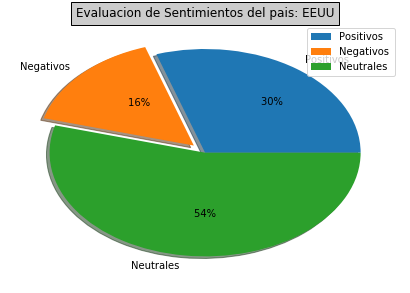

In [92]:
graficar(frecuencias,"EEUU")

## Diagramas de barras

In [96]:
def graficar_diagrama_barras(df,nombre_pais):
    plt.title("Evaluacion de sentimientos del pais: {}".format(nombre_pais))
    df['sentimiento'].value_counts().plot(kind='bar')
    plt.show()

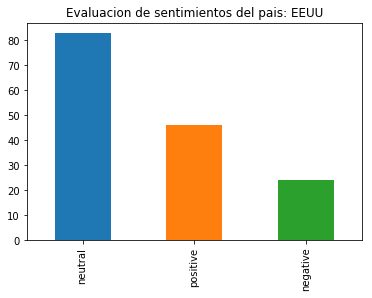

In [101]:

df_analalizado['coordenadas'] = df_japo_filtrado_texto['coordinates']
graficar_diagrama_barras(df_analalizado,"EEUU")

# JAPON

## Preaparar datos

In [105]:
df_japo_raw = pd.read_json('tweets_japon.json')
df_japo_raw = df_japo_raw[cols]
df_japo_filtrado= df_japo_raw[df_japo_raw['lang'] == 'en']
df_japo_filtrado_texto = filtar_texto_valido(df_japo_filtrado)
df_analalizado = analizar_texto(df_japo_filtrado_texto)

In [106]:
df_analalizado

,texto,sentimiento
0,Harry Reid. The Clintons. How did they become ...,neutral
1,Of course,neutral
2,Good point.,positive
3,Plus Trump was lying through her teeth.,neutral
4,"@realDonaldTrump President Trump, please scold...",neutral
5,"@reidepstein Fabulous concept, but those atten...",positive
6,Please!,neutral
7,@maggieNYT Doofus McStooge will get drugged &a...,positive
8,@RexHuppke And just imagine what Russia has on...,neutral
9,Who cares what this Islamist dictator thinks o...,negative


## Cabe recalcar que alrededor de 8000 tweets recolectados tan solo 131 estan en condiciones de ser analizados

In [107]:
df_analalizado['coordenadas'] = df_japo_filtrado_texto['coordinates']

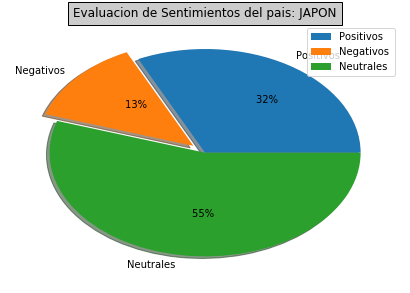

In [112]:
graficar(df_analalizado['sentimiento'].value_counts().to_dict(),"JAPON")

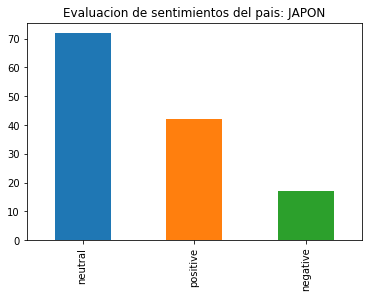

In [113]:
graficar_diagrama_barras(df_analalizado,"JAPON")

## Filtramos por los que tengan coordenadas

In [174]:
def get_lista_coordenadas(df):
    lista_coordenadas = []
    for c in df['coordinates']:
        if type(c)== dict:
            lista_coordenadas.append(c['coordinates'])
    return lista_coordenadas

In [175]:
import simplekml
lista_coordenadas = get_lista_coordenadas(df_japo_raw)


In [178]:
def generar_archivo_kml(lista_coordenadas,nombre_pais):
    kml=simplekml.Kml()
    for coord in lista_coordenadas:
        kml.newpoint(coords=[coord])
    kml.save('{}.kml'.format(nombre_pais))

In [179]:
generar_archivo_kml(lista_coordenadas,"Japon")

#### KML es un lenguaje de marcado basado en XML para representar datos geográficos en tres dimensiones. 

### A traves de los servicios de google especificamente con la herramienta de fusion table, se generan los mapas de calor

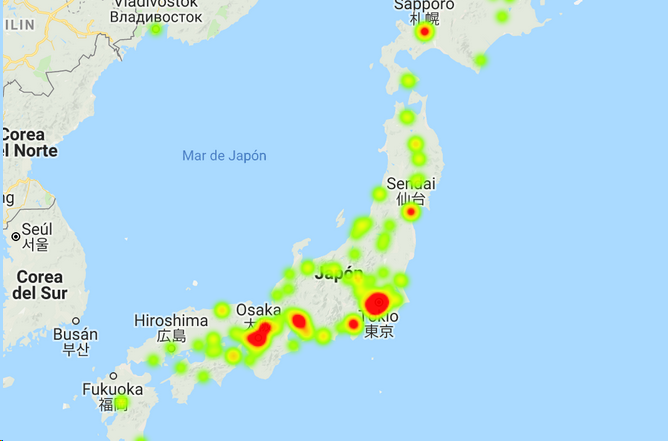

# MEXICO

In [182]:
df_mexico_raw = pd.read_json('tweets_mexico.json')
df_mexico_raw = df_mexico_raw[cols]
df_mexico_filtrado= df_mexico_raw[df_mexico_raw['lang'] == 'en']
df_mexico_filtrado_texto = filtar_texto_valido(df_mexico_filtrado)
df_analalizado_mexico = analizar_texto(df_mexico_filtrado_texto)

In [183]:
lista_coordenadas = get_lista_coordenadas(df_mexico_raw)

In [184]:
generar_archivo_kml(lista_coordenadas,"Mexico")

## Mapa de calor tweets
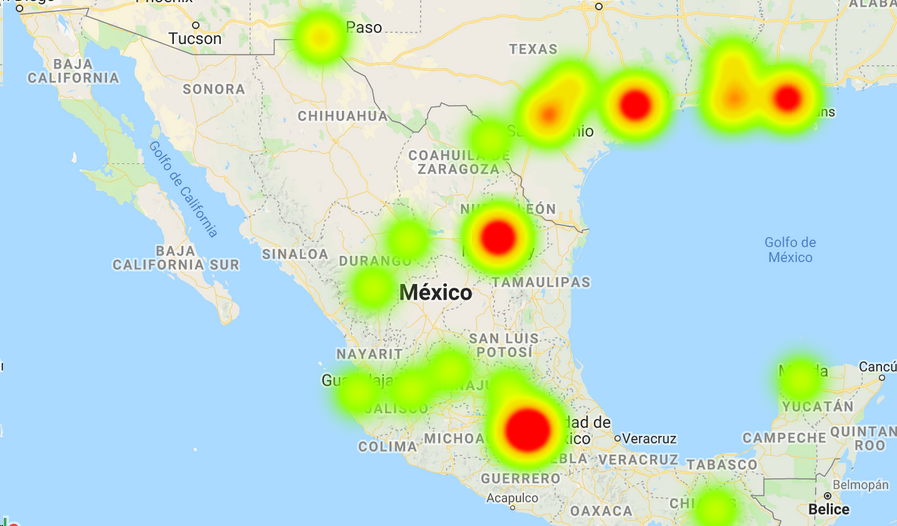

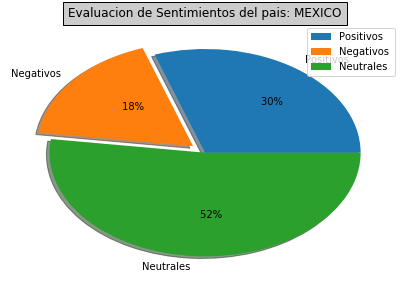

In [185]:
graficar(df_analalizado_mexico['sentimiento'].value_counts().to_dict(),"MEXICO")

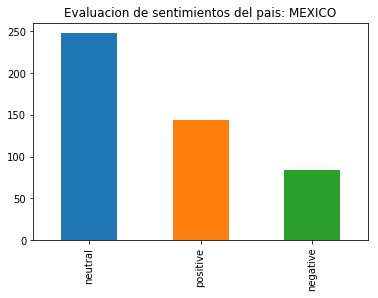

In [186]:
graficar_diagrama_barras(df_analalizado_mexico,"MEXICO")